# New York City Census Data Analysis

#### Stephanie Andrade

It was important for us to look at Census Data in our analysis so I went ahead and I used the requests library to pull some race data from the ACS website. I ran into a few issues, but I was able to create a function to pull the data that I wanted.

In [11]:
import json
import requests
import pandas as pd
import geopandas as gpd

In [12]:
# Requesting Census Data - Population Example
# Our data is specifc to NYC so we need to condense this list to only include NYC data.
r = requests.get('https://api.census.gov/data/2015/acs/acs5?get=NAME,B01001_001E,B01001H_001E&for=county:*&for=tract:*&in=state:36')
print(r.text)

[["NAME","B01001_001E","B01001H_001E","state","county"],
["Schoharie County, New York","31913","29868","36","095"],
["Fulton County, New York","54606","50960","36","035"],
["Rensselaer County, New York","159900","135285","36","083"],
["Franklin County, New York","51280","41999","36","033"],
["Queens County, New York","2301139","601381","36","081"],
["Washington County, New York","62700","58182","36","115"],
["New York County, New York","1629507","767701","36","061"],
["Cayuga County, New York","79173","71808","36","011"],
["Rockland County, New York","320688","204596","36","087"],
["Niagara County, New York","214150","185219","36","063"],
["Essex County, New York","38912","35886","36","031"],
["Nassau County, New York","1354612","851645","36","059"],
["Jefferson County, New York","118947","98419","36","045"],
["Suffolk County, New York","1501373","1045354","36","103"],
["Wyoming County, New York","41446","37232","36","121"],
["Oswego County, New York","121183","114552","36","075"],
["W

In [13]:
censusdata = r.json()

# Turn JSON into a pandas dataframe
df = pd.DataFrame(censusdata[1:], columns=censusdata[0])
df.head()

,NAME,B01001_001E,B01001H_001E,state,county
0,"Schoharie County, New York",31913,29868,36,095
1,"Fulton County, New York",54606,50960,36,035
2,"Rensselaer County, New York",159900,135285,36,083
3,"Franklin County, New York",51280,41999,36,033
4,"Queens County, New York",2301139,601381,36,081


In [14]:
# Renaming the column to be more specfic
df.rename(columns = {'B01001_001E':'Population','B01001H_001E':'NonHispanicWhite'}, inplace=True)
df

,NAME,Population,NonHispanicWhite,state,county
0,"Schoharie County, New York",31913,29868,36,095
1,"Fulton County, New York",54606,50960,36,035
2,"Rensselaer County, New York",159900,135285,36,083
3,"Franklin County, New York",51280,41999,36,033
4,"Queens County, New York",2301139,601381,36,081
...,...,...,...,...,...
57,"Cattaraugus County, New York",78962,71985,36,009
58,"Madison County, New York",72427,67735,36,053
59,"Schenectady County, New York",154796,116261,36,093
60,"Genesee County, New York",59458,54029,36,037


In [15]:
# The data is a string
type(r.text)

str

In [16]:
# Create a new column that will give us the perentage of nonhispanic white individuals in New York State.
df['prc_NonHispanicWhite'] = df.NonHispanicWhite.astype(float) / df.Population.astype(float) * 100 
df.head(20)

,NAME,Population,NonHispanicWhite,state,county,prc_NonHispanicWhite
0,"Schoharie County, New York",31913,29868,36,095,93.591953
1,"Fulton County, New York",54606,50960,36,035,93.323078
2,"Rensselaer County, New York",159900,135285,36,083,84.606004
3,"Franklin County, New York",51280,41999,36,033,81.901326
4,"Queens County, New York",2301139,601381,36,081,26.134058
5,"Washington County, New York",62700,58182,36,115,92.794258
6,"New York County, New York",1629507,767701,36,061,47.112470
7,"Cayuga County, New York",79173,71808,36,011,90.697586
8,"Rockland County, New York",320688,204596,36,087,63.799082
9,"Niagara County, New York",214150,185219,36,063,86.490311


In [17]:
def get_nhWhite(countyFIPS):
    r = requests.get('https://api.census.gov/data/2019/acs/acs5?get=NAME,B01001_001E,B01001H_001E&for=tract:*&in=state:36%20county:{}'.format(countyFIPS))
    censusdata = r.json()
    df = pd.DataFrame(censusdata[1:], columns=censusdata[0])
    df['prc_NonHispanicWhite'] = df.B01001H_001E.astype(float) / df.B01001_001E.astype(float) * 100

    return df

In [18]:
queens_county = get_nhWhite('081')
queens_county

,NAME,B01001_001E,B01001H_001E,state,county,tract,prc_NonHispanicWhite
0,"Census Tract 361, Queens County, New York",2238,73,36,081,036100,3.261841
1,"Census Tract 363, Queens County, New York",1771,66,36,081,036300,3.726708
2,"Census Tract 371, Queens County, New York",1335,19,36,081,037100,1.423221
3,"Census Tract 377, Queens County, New York",3620,17,36,081,037700,0.469613
4,"Census Tract 379, Queens County, New York",6851,63,36,081,037900,0.919574
...,...,...,...,...,...,...,...
664,"Census Tract 660, Queens County, New York",3318,122,36,081,066000,3.676914
665,"Census Tract 683, Queens County, New York",3970,458,36,081,068300,11.536524
666,"Census Tract 716, Queens County, New York",0,0,36,081,071600,NaN
667,"Census Tract 240, Queens County, New York",6826,149,36,081,024000,2.182830


In [19]:
ny_county = get_nhWhite('061')
ny_county

,NAME,B01001_001E,B01001H_001E,state,county,tract,prc_NonHispanicWhite
0,"Census Tract 255, New York County, New York",5999,1602,36,061,025500,26.704451
1,"Census Tract 222, New York County, New York",3369,1084,36,061,022200,32.175720
2,"Census Tract 10.01, New York County, New York",1546,1075,36,061,001001,69.534282
3,"Census Tract 7, New York County, New York",8501,6212,36,061,000700,73.073756
4,"Census Tract 103, New York County, New York",2065,1252,36,061,010300,60.629540
...,...,...,...,...,...,...,...
283,"Census Tract 218, New York County, New York",6236,1280,36,061,021800,20.525978
284,"Census Tract 283, New York County, New York",7949,1537,36,061,028300,19.335766
285,"Census Tract 291, New York County, New York",12165,769,36,061,029100,6.321414
286,"Census Tract 295, New York County, New York",8182,2848,36,061,029500,34.808115


I realized that the dataframe that I had created was apandas dataframe and was still very unsure of how to bring over latitude and longitude for census tracts. I decided that in an effort to save timeI would download the geojson file from Census reporter website. I knew the data that I wanted and I knew how I wanted to clean it to be aggregated to the parks and arrests dataset created by Elise.

In [20]:
race_Df = gpd.read_file('/users/stephanieandrade/Documents/Github/NYCParks-SAEC/data/acs2020_5yr_B03002_14000US36047081800.geojson')
race_Df

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",6600.0,684.0,4285.0,584.0,817.0,280.0,3234.0,437.0,...,17.0,252.0,177.0,113.0,67.0,44.0,41.0,69.0,52.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4167.0,713.0,1224.0,412.0,77.0,91.0,980.0,382.0,...,12.0,1030.0,509.0,304.0,259.0,203.0,241.0,101.0,94.0,"MULTIPOLYGON (((-73.86648 40.80590, -73.86231 ..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5684.0,986.0,1536.0,360.0,371.0,207.0,965.0,315.0,...,17.0,1723.0,981.0,127.0,113.0,47.0,55.0,80.0,87.0,"MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5917.0,719.0,2582.0,584.0,229.0,120.0,1986.0,492.0,...,17.0,1481.0,458.0,369.0,235.0,330.0,231.0,39.0,45.0,"MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ..."
4,14000US36005001901,"Census Tract 19.01, Bronx, NY",1910.0,301.0,881.0,231.0,259.0,103.0,610.0,211.0,...,12.0,434.0,233.0,62.0,56.0,50.0,57.0,12.0,16.0,"MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,14000US36085030302,"Census Tract 303.02, Richmond, NY",6569.0,838.0,3713.0,547.0,1732.0,332.0,1161.0,441.0,...,17.0,1246.0,592.0,166.0,205.0,149.0,202.0,17.0,28.0,"MULTIPOLYGON (((-74.16814 40.62208, -74.16793 ..."
2323,14000US36085031901,"Census Tract 319.01, Richmond, NY",3293.0,681.0,2236.0,539.0,311.0,181.0,1654.0,502.0,...,12.0,194.0,191.0,173.0,255.0,173.0,255.0,0.0,12.0,"MULTIPOLYGON (((-74.16647 40.62852, -74.16645 ..."
2324,14000US36085031902,"Census Tract 319.02, Richmond, NY",4953.0,739.0,3350.0,691.0,498.0,219.0,2613.0,697.0,...,12.0,249.0,222.0,82.0,102.0,65.0,99.0,17.0,26.0,"MULTIPOLYGON (((-74.17129 40.64052, -74.17118 ..."
2325,14000US36085032300,"Census Tract 323, Richmond, NY",1200.0,380.0,812.0,383.0,135.0,70.0,411.0,139.0,...,12.0,23.0,25.0,32.0,34.0,0.0,12.0,32.0,34.0,"MULTIPOLYGON (((-74.19742 40.63592, -74.19739 ..."


In [21]:
race_Df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2327 non-null   object  
 1   name              2327 non-null   object  
 2   B03002001         2327 non-null   float64 
 3   B03002001, Error  2327 non-null   float64 
 4   B03002002         2327 non-null   float64 
 5   B03002002, Error  2327 non-null   float64 
 6   B03002003         2327 non-null   float64 
 7   B03002003, Error  2327 non-null   float64 
 8   B03002004         2327 non-null   float64 
 9   B03002004, Error  2327 non-null   float64 
 10  B03002005         2327 non-null   float64 
 11  B03002005, Error  2327 non-null   float64 
 12  B03002006         2327 non-null   float64 
 13  B03002006, Error  2327 non-null   float64 
 14  B03002007         2327 non-null   float64 
 15  B03002007, Error  2327 non-null   float64 
 16  B03002008       

In [22]:
list(race_Df)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [23]:
keep_race_Df = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002010',
 'B03002011',
 'B03002012',
 'B03002013',
 'B03002014',
 'B03002015',
 'B03002016',
 'B03002017',
 'B03002018',
 'B03002019',
 'B03002020',
 'B03002021',
 'geometry']

In [24]:
race_Df = race_Df[keep_race_Df ]

In [25]:
race_Df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geoid      2327 non-null   object  
 1   name       2327 non-null   object  
 2   B03002001  2327 non-null   float64 
 3   B03002002  2327 non-null   float64 
 4   B03002003  2327 non-null   float64 
 5   B03002004  2327 non-null   float64 
 6   B03002005  2327 non-null   float64 
 7   B03002006  2327 non-null   float64 
 8   B03002007  2327 non-null   float64 
 9   B03002008  2327 non-null   float64 
 10  B03002009  2327 non-null   float64 
 11  B03002010  2327 non-null   float64 
 12  B03002011  2327 non-null   float64 
 13  B03002012  2327 non-null   float64 
 14  B03002013  2327 non-null   float64 
 15  B03002014  2327 non-null   float64 
 16  B03002015  2327 non-null   float64 
 17  B03002016  2327 non-null   float64 
 18  B03002017  2327 non-null   float64 
 19  B03002018  2327 non

In [26]:
race_Df.columns = ['geoid', 'name','Total',
                   'Not Hispanic', 
                   'White',
                   'Black',
                   'American Indian and Alaska Native',
                   'Asian',
                   'Pacific Islander',
                   'Other Race',
                   'Two or more races',
                   'Two or more races including other race',
                   'Three or more races',
                   'Hispanic',
                   'Hispanic White',
                   'Hispanic Black',
                   'Hispanic American Indian and Alaska Native',
                   'Hispanic Asian',
                   'Hispanic Pacific Islander',
                   'Hispanic Other Race',
                   'Hispanic Two or more races',
                   'Hispanic Two or more races including other race',
                   'Hispanic Three or more races','geometry']

In [27]:
race_Df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   geoid                                            2327 non-null   object  
 1   name                                             2327 non-null   object  
 2   Total                                            2327 non-null   float64 
 3   Not Hispanic                                     2327 non-null   float64 
 4   White                                            2327 non-null   float64 
 5   Black                                            2327 non-null   float64 
 6   American Indian and Alaska Native                2327 non-null   float64 
 7   Asian                                            2327 non-null   float64 
 8   Pacific Islander                                 2327 non-null   float64 
 9   Other Race 

In [28]:
list(race_Df)

['geoid',
 'name',
 'Total',
 'Not Hispanic',
 'White',
 'Black',
 'American Indian and Alaska Native',
 'Asian',
 'Pacific Islander',
 'Other Race',
 'Two or more races',
 'Two or more races including other race',
 'Three or more races',
 'Hispanic',
 'Hispanic White',
 'Hispanic Black',
 'Hispanic American Indian and Alaska Native',
 'Hispanic Asian',
 'Hispanic Pacific Islander',
 'Hispanic Other Race',
 'Hispanic Two or more races',
 'Hispanic Two or more races including other race',
 'Hispanic Three or more races',
 'geometry']

In [29]:
keep_race_Df2 = ['geoid',
 'name',
 'Total',
 'White',
 'Black',
 'American Indian and Alaska Native',
 'Asian',
 'Pacific Islander',
 'Other Race',
 'Two or more races',
 'Hispanic',
 'geometry']

In [30]:
race_Df = race_Df[keep_race_Df2]

In [31]:
race_Df

,geoid,name,Total,White,Black,American Indian and Alaska Native,Asian,Pacific Islander,Other Race,Two or more races,Hispanic,geometry
0,14000US36005000100,"Census Tract 1, Bronx, NY",6600.0,817.0,3234.0,27.0,171.0,0.0,0.0,36.0,2315.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ..."
1,14000US36005000200,"Census Tract 2, Bronx, NY",4167.0,77.0,980.0,0.0,115.0,0.0,52.0,0.0,2943.0,"MULTIPOLYGON (((-73.86648 40.80590, -73.86231 ..."
2,14000US36005000400,"Census Tract 4, Bronx, NY",5684.0,371.0,965.0,0.0,87.0,0.0,2.0,111.0,4148.0,"MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ..."
3,14000US36005001600,"Census Tract 16, Bronx, NY",5917.0,229.0,1986.0,192.0,63.0,0.0,55.0,57.0,3335.0,"MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ..."
4,14000US36005001901,"Census Tract 19.01, Bronx, NY",1910.0,259.0,610.0,0.0,0.0,0.0,0.0,12.0,1029.0,"MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2322,14000US36085030302,"Census Tract 303.02, Richmond, NY",6569.0,1732.0,1161.0,0.0,638.0,0.0,61.0,121.0,2856.0,"MULTIPOLYGON (((-74.16814 40.62208, -74.16793 ..."
2323,14000US36085031901,"Census Tract 319.01, Richmond, NY",3293.0,311.0,1654.0,0.0,271.0,0.0,0.0,0.0,1057.0,"MULTIPOLYGON (((-74.16647 40.62852, -74.16645 ..."
2324,14000US36085031902,"Census Tract 319.02, Richmond, NY",4953.0,498.0,2613.0,0.0,121.0,0.0,0.0,118.0,1603.0,"MULTIPOLYGON (((-74.17129 40.64052, -74.17118 ..."
2325,14000US36085032300,"Census Tract 323, Richmond, NY",1200.0,135.0,411.0,0.0,15.0,0.0,17.0,234.0,388.0,"MULTIPOLYGON (((-74.19742 40.63592, -74.19739 ..."


In [32]:
race_Df['Percent_White'] = race_Df['White']/race_Df['Total']*100

race_Df['Percent_Black'] = race_Df['Black']/race_Df['Total']*100

race_Df['Percent_American_Indian_and_Alaska Native'] = race_Df['American Indian and Alaska Native']/race_Df['Total']*100

race_Df['Percent_Asian'] = race_Df['Asian']/race_Df['Total']*100

race_Df['Percent_Pacific_Islander'] = race_Df['Pacific Islander']/race_Df['Total']*100

race_Df['Percent_Other_Race'] = race_Df['Other Race']/race_Df['Total']*100

race_Df['Percent_Two_or_more_races'] = race_Df['Two or more races']/race_Df['Total']*100

race_Df['Percent_Hispanic'] = race_Df['Hispanic']/race_Df['Total']*100

In [33]:
race_Df.head(5)

,geoid,name,Total,White,Black,American Indian and Alaska Native,Asian,Pacific Islander,Other Race,Two or more races,Hispanic,geometry,Percent_White,Percent_Black,Percent_American_Indian_and_Alaska Native,Percent_Asian,Percent_Pacific_Islander,Percent_Other_Race,Percent_Two_or_more_races,Percent_Hispanic
0,14000US36005000100,"Census Tract 1, Bronx, NY",6600.0,817.0,3234.0,27.0,171.0,0.0,0.0,36.0,2315.0,"MULTIPOLYGON (((-73.89772 40.79514, -73.89611 ...",12.378788,49.000000,0.409091,2.590909,0.0,0.000000,0.545455,35.075758
1,14000US36005000200,"Census Tract 2, Bronx, NY",4167.0,77.0,980.0,0.0,115.0,0.0,52.0,0.0,2943.0,"MULTIPOLYGON (((-73.86648 40.80590, -73.86231 ...",1.847852,23.518119,0.000000,2.759779,0.0,1.247900,0.000000,70.626350
2,14000US36005000400,"Census Tract 4, Bronx, NY",5684.0,371.0,965.0,0.0,87.0,0.0,2.0,111.0,4148.0,"MULTIPOLYGON (((-73.85960 40.81528, -73.85870 ...",6.527094,16.977481,0.000000,1.530612,0.0,0.035186,1.952850,72.976777
3,14000US36005001600,"Census Tract 16, Bronx, NY",5917.0,229.0,1986.0,192.0,63.0,0.0,55.0,57.0,3335.0,"MULTIPOLYGON (((-73.86246 40.81925, -73.86153 ...",3.870204,33.564306,3.244888,1.064729,0.0,0.929525,0.963326,56.363022
4,14000US36005001901,"Census Tract 19.01, Bronx, NY",1910.0,259.0,610.0,0.0,0.0,0.0,0.0,12.0,1029.0,"MULTIPOLYGON (((-73.93180 40.80788, -73.93094 ...",13.560209,31.937173,0.000000,0.000000,0.0,0.000000,0.628272,53.874346


<AxesSubplot:>

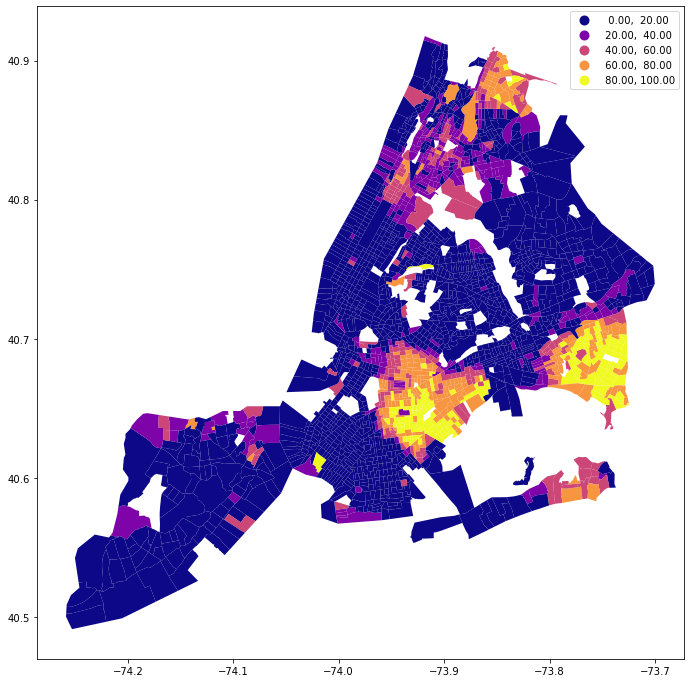

In [34]:
race_Df.plot(figsize=(12,12),
                 column='Percent_Black',
                  cmap='plasma',
                 legend=True, 
                 scheme='equal_interval')

In [35]:
race_Df_web_mercator = race_Df.to_crs(epsg=3857)

In [36]:
import contextily as ctx 
fig, ax = plt.subplots(figsize=(10,10))

race_Df_web_mercator[race_Df_web_mercator['Percent_Black']>60].plot(ax=ax, 
                                                                       edgecolor='black',
                                                                         lw=0.5,
                                                                       alpha=0.5, 
                                                                       color='#e34a33')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron, zoom=12)

NameError: name 'plt' is not defined

In [ ]:
race_Df.to_file("race_Df_clean.gpkg", driver="GPKG")

In [ ]:
parkgdf = pd.read_pickle('../NYCParks-SAEC/parkgdf.pandas')
parkgdf

In [ ]:
parkgdf.to_crs('EPSG:3497', inplace=True)
race_Df.to_crs('EPSG:3497', inplace=True)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
parkrace = race_Df.sjoin_nearest(parkgdf, distance_col='dist_to_park')
# use this join, don't need the centroid
fig, ax=plt.subplots(figsize=(10,10))
parkrace.plot(ax=ax)
parkrace.plot(ax=ax, lw=4, alpha=0.5)

In [ ]:
parkrace

In [ ]:
parkrace.columns

In [ ]:
parkrace.info()

In [ ]:
parkrace['hundred_m']=parkrace.dist_to_park<101
pd.set_option('display.max_columns', None)
parkrace

In [ ]:
hundredmeter_race = parkrace[parkrace.hundred_m==True]
hundredmeter_race

In [ ]:
hundredmeter_race.set_index("geoid", inplace = True)

In [ ]:
close_park = hundredmeter_race.Percent_Black.value_counts().reset_index()
close_park

I was trying some additional joins between census and parks data, but did not have any relative new information of analysis that could be pulled from this. This was a great way to familiarize myself with other ways to join.